In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import heartpy as hp
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

## Normal 

In [194]:
df_normal = pd.read_csv('../data/ptbdb_normal.csv', header=None)
df_normal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
df_normal.dropna()
df_normal = df_normal.drop(df_normal.columns[-1], axis=1)
df_normal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Abnormal

In [196]:
df_abnormal = pd.read_csv('../data/ptbdb_abnormal.csv',header=None)
df_abnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [197]:
df_abnormal.dropna()
df_abnormal = df_abnormal.drop(df_abnormal.columns[-1], axis=1)
df_abnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filrowanie sygnału
Używamy heartpy do filtrowania sygnału

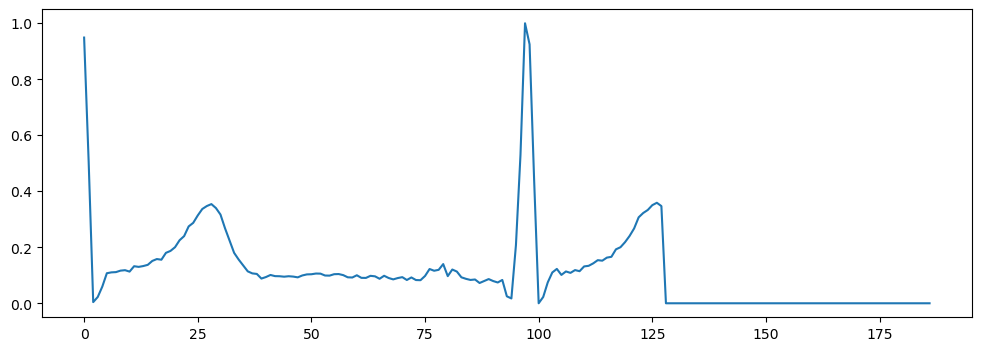

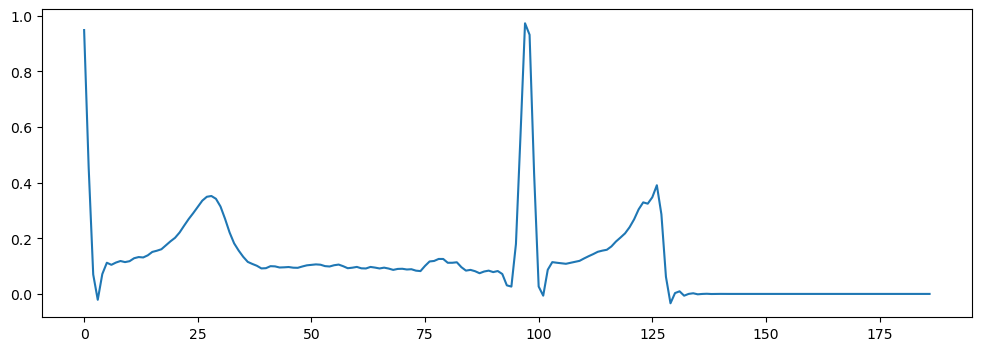

In [198]:
plt.figure(figsize=(12,4))
plt.plot(df_normal.iloc[5])
plt.show()

data_filtered = hp.filter_signal(df_normal.iloc[5], cutoff=8, sample_rate=25.0, order=3, filtertype='lowpass')

plt.figure(figsize=(12,4))
plt.plot(data_filtered)
plt.show()

In [199]:
def apply_lowpass_filter(df):
    df_result = pd.DataFrame()
    
    for i in range(0, len(df)):
        filtered = hp.filter_signal(df.iloc[i], cutoff=8, sample_rate=25.0, order=3, filtertype='lowpass')

        df_result = pd.concat([df_result, pd.DataFrame([filtered])])
        
    return df_result

In [200]:
df_normal = apply_lowpass_filter(df_normal)
df_normal["class"] = 0
df_normal = df_normal.reset_index(drop=True)
df_normal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,1.000002,0.854384,0.403068,0.039725,0.038256,0.132519,0.135268,0.114923,0.113544,0.111731,...,1.217738e-14,-2.762940e-14,1.160819e-14,3.610845e-15,-6.493559e-15,2.445856e-15,1.014178e-15,-1.516756e-15,5.069101e-16,0
1,0.999999,0.770372,0.408226,0.086878,0.023525,0.160702,0.279913,0.304991,0.317618,0.347677,...,3.597487e-13,-6.211030e-12,3.505931e-12,2.861241e-13,-1.489557e-12,7.654615e-13,1.127973e-13,-3.547282e-13,1.654506e-13,0
2,0.909030,0.760749,0.462411,0.158663,0.011819,0.008553,0.057185,0.080695,0.075718,0.074361,...,-5.204568e-05,-1.135515e-05,2.627975e-05,-1.112686e-05,-3.384202e-06,6.179209e-06,-2.346994e-06,-9.536288e-07,1.443975e-06,0
3,0.999997,0.449117,0.098008,0.035883,0.087638,0.078262,0.049903,0.051925,0.051884,0.044428,...,-7.805846e-12,-5.468328e-11,3.500407e-11,9.350594e-14,-1.325200e-11,7.734470e-12,4.614975e-13,-3.186630e-12,1.694330e-12,0
4,1.000001,0.775514,0.304991,0.054341,0.128078,0.149426,0.094851,0.093642,0.102194,0.093689,...,6.150018e-11,1.501943e-11,-3.199268e-11,1.309489e-11,4.384216e-12,-7.507504e-12,2.748756e-12,1.218867e-12,-1.750957e-12,0
5,0.948984,0.455272,0.069958,-0.021203,0.071340,0.112125,0.104691,0.112812,0.118356,0.114429,...,-1.178370e-12,6.385581e-13,6.987671e-14,-2.817172e-13,1.388277e-13,2.481712e-14,-6.689108e-14,2.986212e-14,7.711056e-15,0
6,1.000005,0.482087,0.120950,-0.002399,0.028936,0.065637,0.061470,0.051301,0.051361,0.054654,...,-5.004890e-08,5.691284e-08,-1.449898e-08,-1.295635e-08,1.306277e-08,-2.773992e-09,-3.298505e-09,2.979786e-09,-5.034497e-10,0
7,0.999999,0.465572,0.112578,0.021885,0.114617,0.225799,0.266002,0.262064,0.262129,0.272998,...,-5.745575e-09,5.233570e-09,-9.022861e-10,-1.444136e-09,1.186884e-09,-1.514109e-10,-3.587049e-10,2.673960e-10,-2.153572e-11,0
8,0.999973,0.694687,0.186698,0.006727,0.244471,0.356482,0.263862,0.236489,0.272210,0.267821,...,5.864475e-18,-3.509137e-18,-1.535868e-19,1.413058e-18,-7.705791e-19,-8.095386e-20,3.379867e-19,-1.676425e-19,-2.913861e-20,0
9,1.000000,0.694075,0.343505,0.073489,0.047552,0.195691,0.294492,0.301184,0.318007,0.351880,...,2.662269e-13,-5.637152e-12,3.204723e-12,2.463619e-13,-1.352683e-12,7.002026e-13,9.945480e-14,-3.223015e-13,1.514692e-13,0


In [201]:
df_abnormal = apply_lowpass_filter(df_abnormal)
df_abnormal["class"] = 1
df_abnormal = df_abnormal.reset_index(drop=True)
df_abnormal.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.932252,0.875520,0.884205,0.918772,0.933111,0.904035,0.825016,0.739712,0.682774,0.649159,...,-9.319866e-27,-1.229928e-26,1.072490e-26,-1.651017e-27,-3.075484e-27,2.425637e-27,-2.626477e-28,-7.605221e-28,5.449178e-28,1
1,1.000005,0.618659,0.372918,0.254351,0.233937,0.266280,0.255019,0.191705,0.144576,0.127736,...,-4.833629e-09,3.790971e-09,-4.003019e-10,-1.194566e-09,8.513024e-10,-4.875000e-11,-2.923748e-10,1.898010e-10,-1.049451e-12,1
2,1.000003,0.957961,0.914979,0.859784,0.791948,0.726190,0.685390,0.673206,0.673472,0.676853,...,-1.581167e-21,1.802675e-20,-9.973060e-21,-9.491519e-22,4.316521e-21,-2.172953e-21,-3.533971e-22,1.026446e-21,-4.685683e-22,1
3,0.977830,0.816402,0.316325,0.006791,0.115812,0.258144,0.311946,0.366156,0.391198,0.378361,...,-1.457977e-18,-2.786269e-18,2.183290e-18,-2.296011e-19,-6.885239e-19,4.902492e-19,-2.784905e-20,-1.685058e-19,1.092947e-19,1
4,0.935621,0.775073,0.860739,0.940565,0.746684,0.504097,0.413157,0.343780,0.273222,0.281839,...,7.133976e-29,-7.002813e-28,3.836826e-28,3.906352e-29,-1.675586e-28,8.351287e-29,1.420875e-29,-3.981672e-29,1.798759e-29,1
5,0.925272,0.414352,0.100634,0.059634,0.143051,0.183658,0.181259,0.183831,0.194719,0.206727,...,1.061961e-19,-7.217404e-20,2.278208e-21,2.587521e-20,-1.602971e-20,-3.571171e-22,6.252887e-21,-3.531468e-21,-2.869580e-22,1
6,0.999168,0.778768,0.524947,0.230658,0.034373,0.034628,0.111092,0.141711,0.146645,0.165334,...,2.188986e-16,1.042237e-16,-1.436357e-16,4.492023e-17,2.781632e-17,-3.324461e-17,9.004208e-18,7.254664e-18,-7.648174e-18,1
7,0.999987,0.877156,0.675280,0.350972,0.060551,-0.001355,0.086389,0.140076,0.152599,0.167059,...,-1.002387e-09,7.913466e-10,-8.605282e-11,-2.478989e-10,1.777881e-10,-1.077572e-11,-6.071163e-11,3.965829e-11,-3.622141e-13,1
8,0.999991,0.756676,0.548922,0.368661,0.287305,0.300660,0.282567,0.228126,0.209754,0.217546,...,-5.798436e-07,-2.907599e-07,3.890859e-07,-1.185015e-07,-7.721440e-08,8.994848e-08,-2.362596e-08,-2.006034e-08,2.066883e-08,1
9,0.932231,0.808041,0.628448,0.425113,0.257501,0.151796,0.105167,0.090430,0.079537,0.072717,...,6.050762e-10,-2.360138e-09,1.155638e-09,2.122580e-10,-5.601448e-10,2.483909e-10,6.555240e-11,-1.320822e-10,5.272533e-11,1


## Merge dataframes

In [202]:
df_merged = pd.concat([df_normal, df_abnormal])
print(f"{df_normal.shape[0]} + {df_abnormal.shape[0]} = {df_merged.shape[0]}")

4046 + 10506 = 14552


# Splitting data

In [203]:
from sklearn.model_selection import train_test_split

X = df_merged.iloc[:, :-1]
y = df_merged.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

print(f"X_train length = {len(X_train)}; y_train length = {len(y_train)}")
print(f"X_test length = {len(X_test)}; y_test length = {len(y_test)}")

X_train length = 10914; y_train length = 10914
X_test length = 3638; y_test length = 3638


## Training models

In [204]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [205]:
model = GradientBoostingClassifier()

In [206]:
n_scores = cross_val_score(model, X_train, y_train, cv=2, n_jobs=-1)

In [207]:
n_scores

array([0.92358439, 0.91552135])

In [208]:
np.mean(n_scores)

0.9195528678761224

In [209]:
np.std(n_scores)

0.004031519149715945

In [212]:
print('The accuracy of the Gradient Boosting Classifier on the training data is {:.2f} out of 1'.format(model.score(X_train, y_train)))
print('The accuracy of the Gradient Boosting Classifier on the test data is {:.2f} out of 1'.format(model.score(X_test, y_test)))

The accuracy of the Gradient Boosting Classifier on the training data is 0.95 out of 1
The accuracy of the Gradient Boosting Classifier on the test data is 0.93 out of 1


### Implementing XGBoost

In [230]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

In [231]:
n_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=10, n_jobs=-1)


In [232]:
n_scores_xgb

array([0.97893773, 0.97619048, 0.97161172, 0.98534799, 0.97341888,
       0.97250229, 0.97800183, 0.97616865, 0.97066911, 0.97066911])

In [233]:
np.mean(n_scores_xgb)

0.9753517792931176

In [234]:
np.std(n_scores_xgb)

0.0043689257493486995

## Dodatkowwe parametry do , sprobujcie to ale trwa dlugo (co najmniej 10-15min)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

# Initialize the XGBoost classifier
model_xgb = XGBClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Fit the model with the best parameters
model_xgb_best = XGBClassifier(**best_params)
model_xgb_best.fit(X_train, y_train)

# Evaluate the model with your test data
score = model_xgb_best.score(X_test, y_test)
print("Model Score: ", score)

### AdaBoost - Adaptive Boosting

In [222]:
from sklearn.ensemble import AdaBoostClassifier

In [223]:
model_ada = AdaBoostClassifier()

In [224]:
n_scores_ada = cross_val_score(model_ada, X_train, y_train, cv=2, n_jobs=-1)


In [225]:
n_scores_ada

array([0.87007513, 0.85889683])

In [226]:
np.mean(n_scores_ada)

0.8644859813084111

In [227]:
np.std(n_scores_ada)

0.005589151548469895

In [228]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [229]:
print('The accuracy of the Adaptive Boosting Classifier on the training data is {:.2f} out of 1'.format(model_ada.score(X_train, y_train)))
print('The accuracy of the Adaptive Boosting Classifier on the test data is {:.2f} out of 1'.format(model_ada.score(X_test, y_test)))

The accuracy of the Adaptive Boosting Classifier on the training data is 0.88 out of 1
The accuracy of the Adaptive Boosting Classifier on the test data is 0.87 out of 1
